## Connect to Google

Let’s get started with the task of analyzing the Google search trends by importing the required python libraries. First, we need to import **pandas** to create a dataframe. Second, we need to connect to Google as we are requesting the Google trending topics, so for this, we need to import the method **TrendReq** from **pytrends.request** library. Also, we will import **matplotlib**, to visualize the data.

In [3]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)


## Build Payload

Now, we will be creating a dataframe of the top 10 countries that search for the term **“CLOUD COMPUTING“**. For this, we will be using the method **build_payload**, which allows storing a list of keywords that you want to search. In this, you can also specify the timeframe and the category to query the data from. 

In [4]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(5) # Wait for 5 seconds


## Interest Over Time

The **interest_over_time()** method, returns the historical, indexed data for when the specified keyword was most searched according to the timeframe mentioned in the build payload method.

In [6]:
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)


            Cloud Computing  isPartial
date                                  
2023-12-03              100      False
2023-12-10               95      False
2024-01-28               88      False
2024-01-21               87      False
2023-11-26               86      False
2024-02-04               85      False
2023-12-17               84      False
2024-11-17               82      False
2024-02-18               82      False
2024-03-17               82      False


## Historical Hour Interest

The **get_historical_interest()** method returns the historical, indexed, hourly data for when the specified keyword was most searched. You can also mention various time period parameters for which you want the historical data such as year_start, month_start, day_start, hour_start, year_end, month_end, day_end, and hour_end. 

In [13]:
time.sleep(10)
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2018-01-01 2018-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2018-01-30              100      False
2018-01-18               97      False
2018-02-01               96      False
2018-01-08               94      False
2018-01-04               91      False
2018-01-10               90      False
2018-01-11               90      False
2018-01-24               90      False
2018-01-09               88      False
2018-01-22               88      False


## Interest By Region

Next is the **interest_by_region method**, this will let you know the performance of the keyword per region. It will show results on a scale of 0-100, where 100 indicates the country with the most search and 0 indicates with least search or not enough data. 

In [16]:
time.sleep(15)
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", 
                        ascending = False)
data = data.head(10)
print(data)

            Cloud Computing
geoName                    
Ethiopia                100
Nepal                    49
St. Helena               43
India                    39
China                    35
Singapore                23
Sri Lanka                22
Kenya                    22
Pakistan                 22
Ireland                  16


Next, we can visualize the above data using a bar chart.

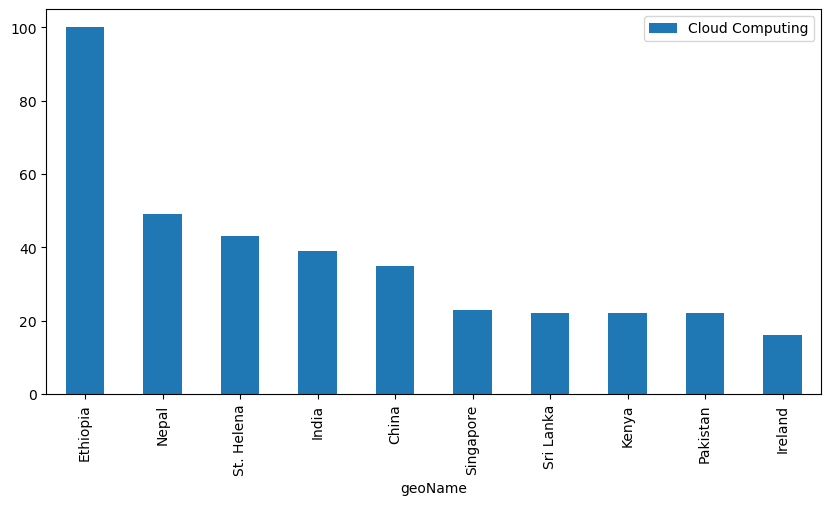

In [17]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

## Top Charts

Using this method, we can get the top trending searches yearly. So, let us check what were the searches trending in the year 2020.

In [18]:
df = Trending_topics.top_charts(2020, hl='en-US', 
                                tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


From the above output, we can see, that the most searched topic of 2020 is **“Coronavirus”** and then the rest.

## Related Queries

Whenever a user searches for something about a particular topic on Google there is a high probability that the user will search for more queries related to the same topic. These are known as related queries. Let us find a list of related queries for “Cloud Computing”.

In [19]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


## Keyword Suggestions

The suggestions() method, will help you to explore what the world is searching for. It returns a list of additional suggested keywords that can be used to filter a trending search on Google.

In [20]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Cloud computing,Topic
1,Cloud computing,Topic
2,Cloud computing security,Topic
3,Alibaba Cloud,Computer software company
4,Private cloud computing infrastructure,Topic
